In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


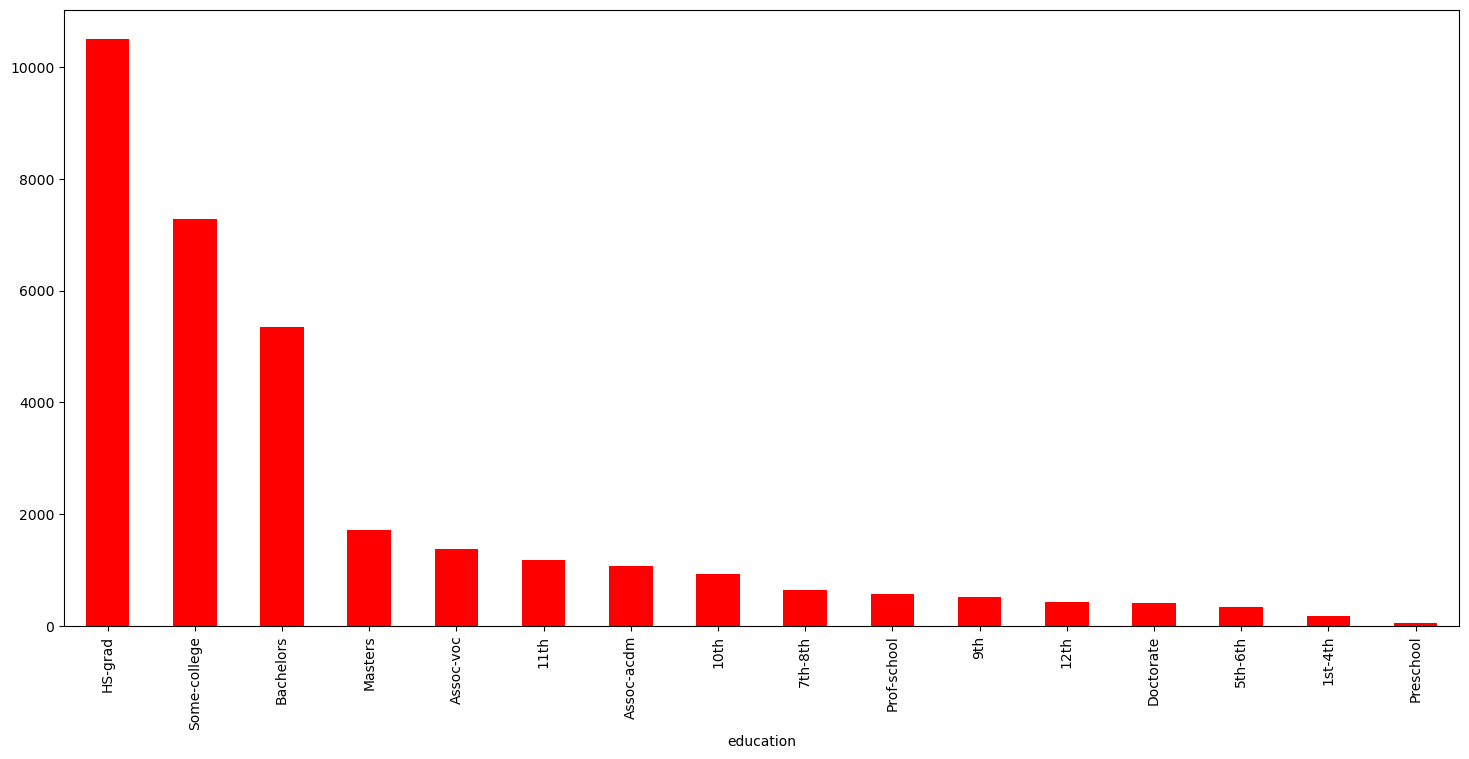

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
df["education"].value_counts().plot(kind='bar',color='r')
plt.show()

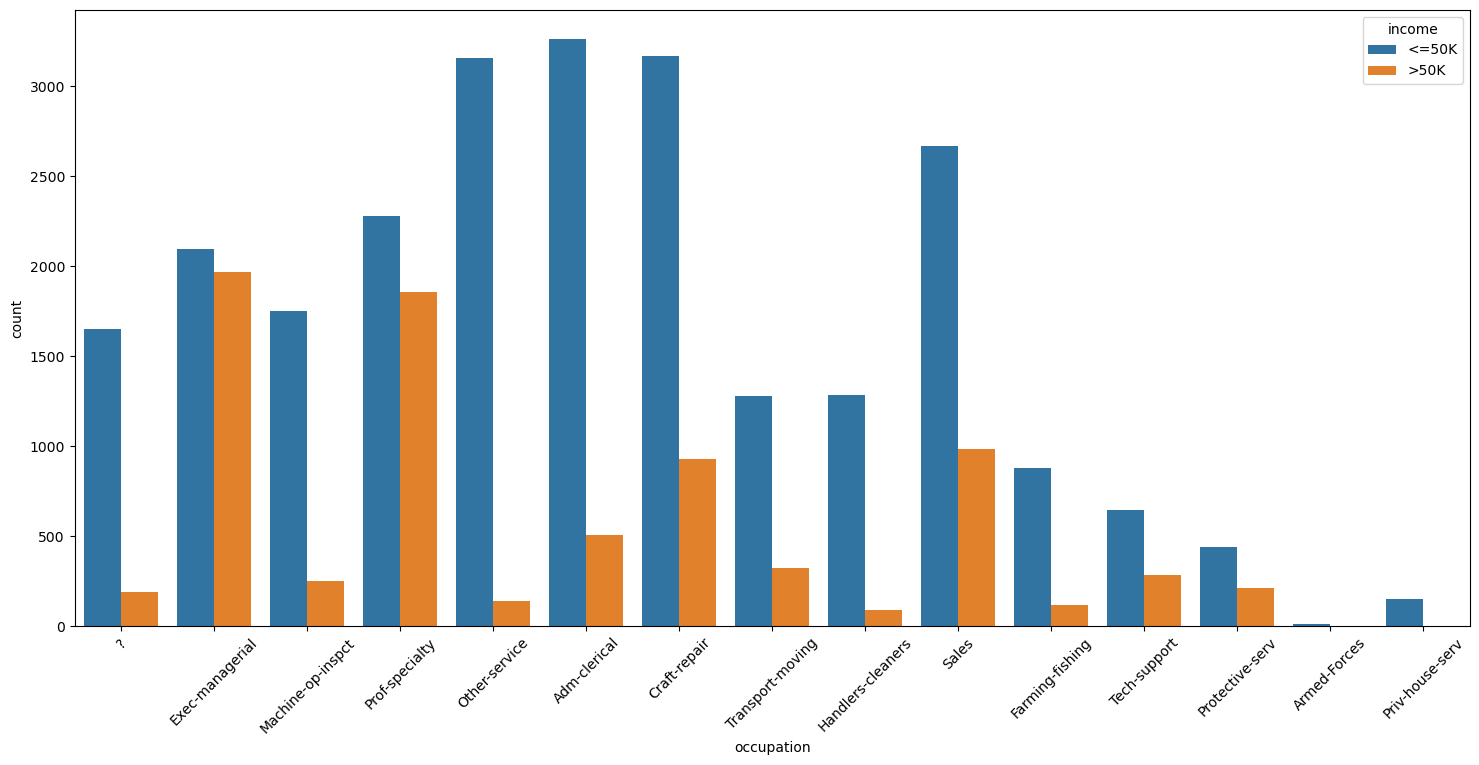

In [5]:
plt.figure(figsize=(18,8))
sns.countplot(x='occupation', hue='income', data=df)
plt.xticks(rotation=45)
plt.show()


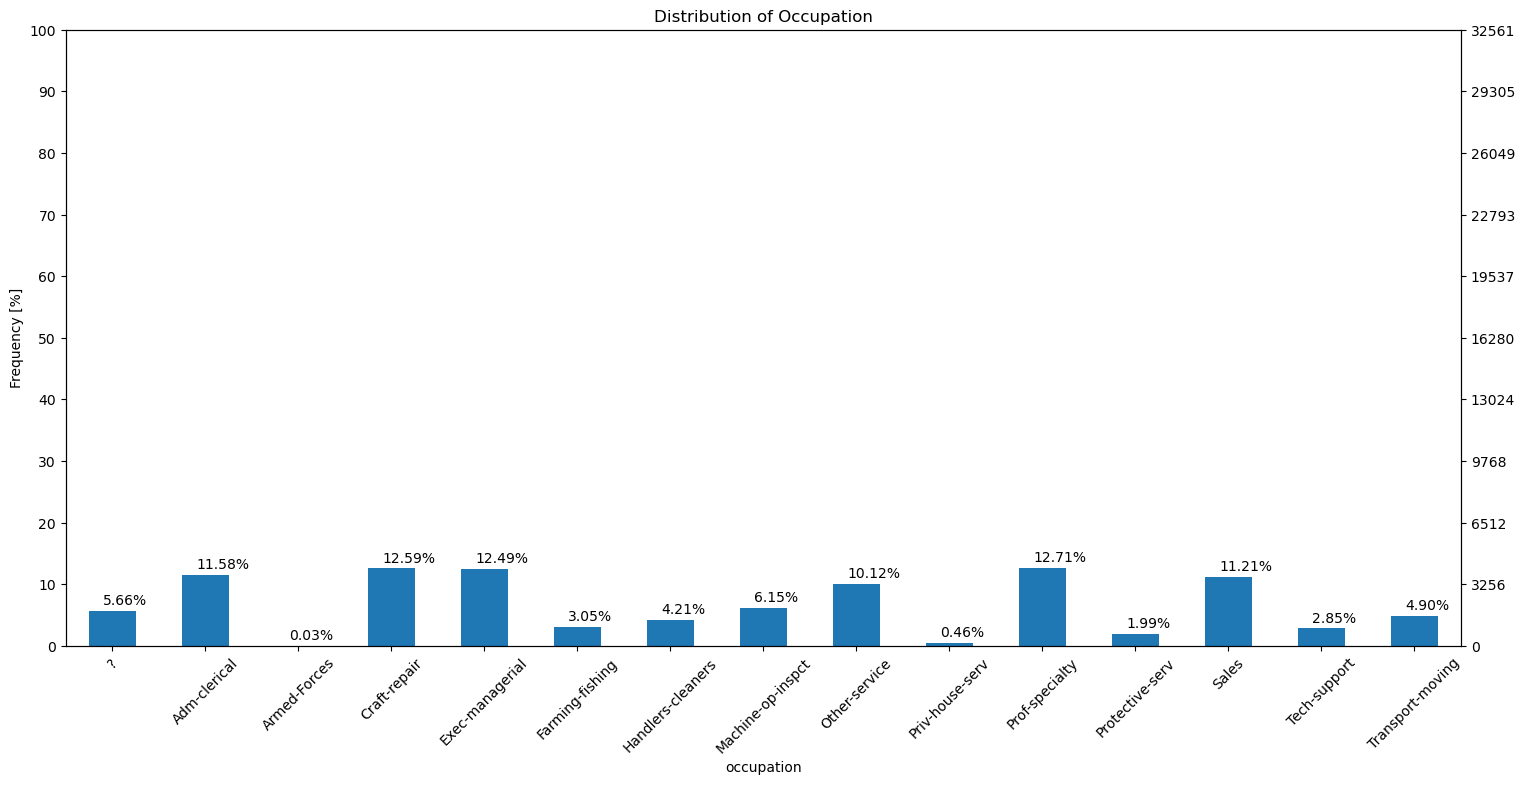

In [6]:
plt.figure(figsize=(18,8))
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency [%]')

ax = (df["occupation"].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=45)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

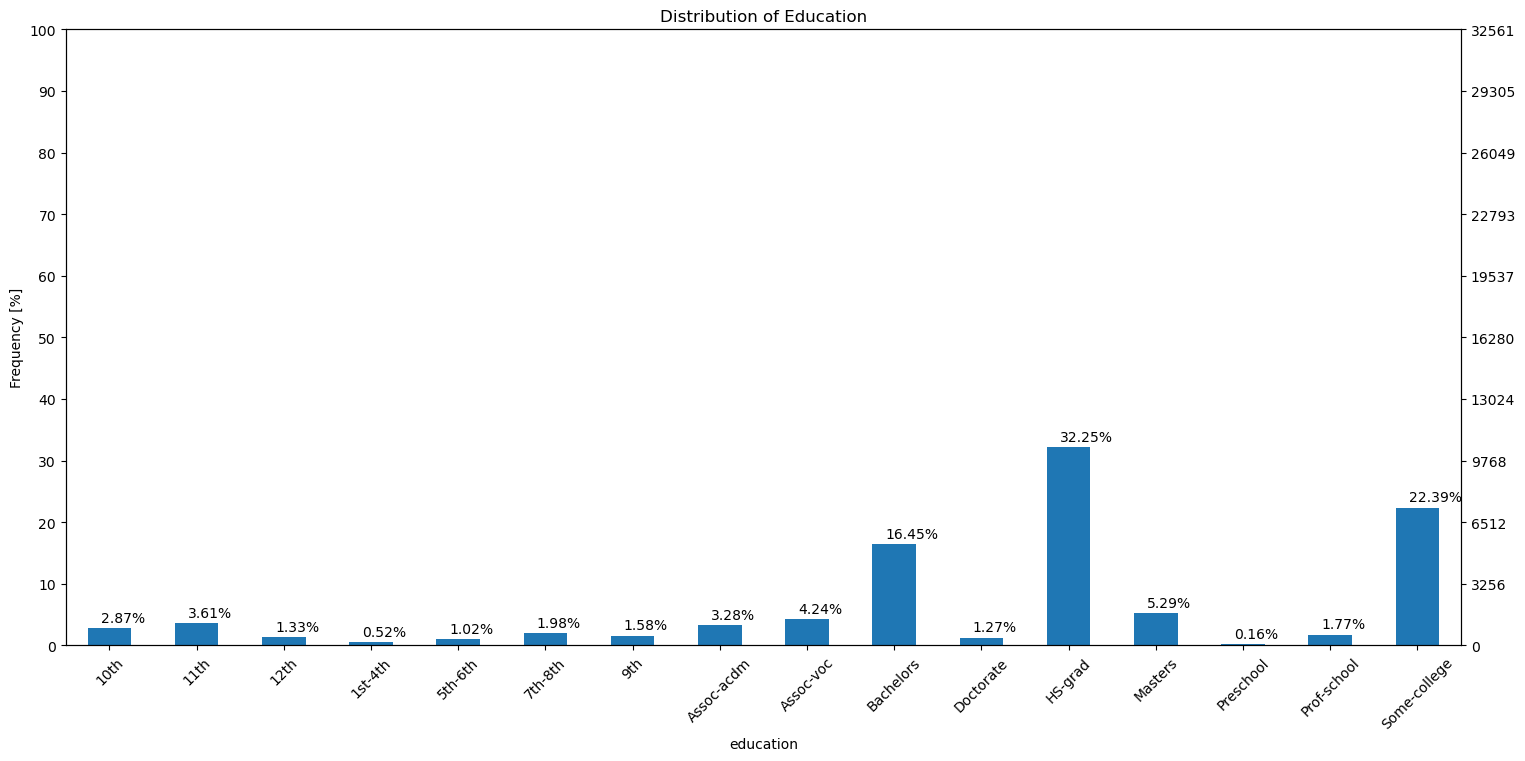

In [7]:
plt.figure(figsize=(18,8))
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency [%]')

ax = (df["education"].value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=45)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [8]:
cols = df.columns
for c in cols:
    df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [9]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [10]:
df.replace(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
             ['unmarried','unmarried','unmarried','never married',
              'married','married','married'], inplace = True)


In [11]:
# Discretisize the marital status column
df['marital.status'].unique()

array(['unmarried', 'never married', 'married'], dtype=object)

In [12]:
#Encode the workclass
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df.replace(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
             ['private','govt','govt','self-emp',
              'self-emp','govt','unemployed','unemployed'], inplace = True)

In [14]:
from sklearn.preprocessing import LabelEncoder 
category_col =['workclass', 'race', 'education','marital.status', 'occupation',
               'relationship', 'sex', 'native.country', 'income'] 
labelEncoder = LabelEncoder()
# classes_ : array of shape (n_class,); Holds the label for each class.
mapping_dict={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=mapping
print(mapping_dict)

{'workclass': {'govt': 0, 'private': 1, 'self-emp': 2, 'unemployed': 3}, 'race': {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital.status': {'married': 0, 'never married': 1, 'unmarried': 2}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'sex': {'Female': 0, 'Male': 1}, 'native.country': {'Cambodia': 0, 'Canada': 1, 'Chin

In [15]:
#droping redundant columns
df.drop(['fnlwgt','education.num'], axis=1, inplace=True)
df.head(2)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,11,2,9,1,4,0,0,4356,40,38,0
1,82,1,11,2,3,1,4,0,0,4356,18,38,0


In [16]:
X = df.values[:, :-1]
y = df.values[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 101)
tree = DecisionTreeClassifier(criterion = "gini", random_state = 101)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print ("Decision Tree Accuracy is: ", accuracy_score(y_test,y_pred)*100 )

Decision Tree Accuracy is:  81.2062400196536


In [18]:
depths = np.arange(1, 10)
max_features = [1, 2, 5, 8, 10]

from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth':depths,
              'max_features':max_features}]

tree = DecisionTreeClassifier(criterion = "gini", random_state = 101)
gs = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy', cv=10)

In [19]:
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8517199017199018
{'max_depth': 9, 'max_features': 10}


In [20]:
tree = gs.best_estimator_
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print ("Decision Tree Accuracy is: ", accuracy_score(y_test,y_pred)*100 )

Decision Tree Accuracy is:  84.97727551897802


In [21]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2,5,10],
    'max_features': [2, 3, 5, 10],
    'n_estimators': [100, 250]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 2)

In [22]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 250}

In [23]:
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy is: ", accuracy_score(y_test,y_pred)*100 )

Random Forest Accuracy is:  85.89853826311264


In [24]:
# Serializing our model to a file called model.pkl
import joblib

# Save the trained model as a pickle string.
census_model_rf = joblib.dump(rf, 'census_model_rf.pkl')


In [ ]:
#importing libraries
import os

import flask
from flask import Flask, render_template, request

#creating instance of the class
app=Flask(__name__)

# Tell flask which URL should activate the index()
#prediction function
def ValuePredictor(to_predict_list):
    to_predict = np.array(to_predict_list).reshape(1,12)
    loaded_model = joblib.load("census_model_rf.pkl")
    result = loaded_model.predict(to_predict)
    return result[0]

@app.route('/')
@app.route('/index')
def index():
    return flask.render_template('index.html')

@app.route('/result',methods = ['POST'])
def result():
    if request.method == 'POST':
        to_predict_list = request.form.to_dict()
        to_predict_list=list(to_predict_list.values())
        to_predict_list = list(map(int, to_predict_list))
        result = ValuePredictor(to_predict_list)
        
        if int(result)==1:
            prediction='Income more than 50K'
        else:
            prediction='Income less than 50K'
            
        return render_template("result.html",prediction=prediction)


if __name__ == "__main__":
    app.run(debug=True, port = 8000, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [25/Nov/2023 18:26:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2023 18:26:58] "GET /style.css HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2023 18:27:02] "POST /result HTTP/1.1" 500 -
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\flask\app.py", line 2548, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\Users\HP\anaconda3\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.handle_exception(e)
  File "C:\Users\HP\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\HP\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\HP\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\HP\anaconda3\lib\site-packages\fl